#About the data set:
 using google images that collected by https://download-all-images.mobilefirst.me extention was a big help !

 

In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
import pathlib
Dir = 'baby_img'
dataDir = pathlib.Path(Dir)
dataDir

PosixPath('baby_img')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

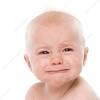

In [ ]:
crying = list(dataDir.glob("crying/*"))
Image.open(crying[0])

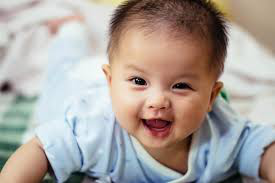

In [ ]:
happy = list(dataDir.glob("happy/*"))
Image.open(str(happy[0]))


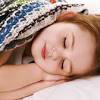

In [ ]:
sleeping = list(dataDir.glob("sleeping/*"))
Image.open(str(sleeping[0]))

In [ ]:
img_dic ={
    'crying':crying,
    'happy':happy,
    'sleeping':sleeping
}

label_dic ={
    'crying':0,
    'happy':1,
    'sleeping':2
}

In [ ]:
train =[]
test = []

for key,value in img_dic.items():
  for img in value:
    re = cv2.imread(str(img))
    img = cv2.resize(re,(224,224))
    train.append(img)
    test.append(label_dic[key])

In [ ]:
train = np.array(train)
test = np.array(test)
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train,test, train_size=0.8,random_state = 4)

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
fmodel = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pre_trained = hub.KerasLayer(fmodel,input_shape = (224,224,3), trainable = False )


 the model accepts only 224 X 224 imgs according to the model doc, so imgs resized as required.
  model link: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

In [ ]:
no_of_shapes = 3
model = tf.keras.Sequential([pre_trained, tf.keras.layers.Dense(no_of_shapes)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)


In [ ]:
model.fit(x_train_scaled,y_train , epochs= 20)

Epoch 1/20
13/13 [==============================] - 1s 89ms/step - loss: 0.2895 - acc: 0.9277
Epoch 2/20
13/13 [==============================] - 1s 83ms/step - loss: 0.2664 - acc: 0.9373
Epoch 3/20
13/13 [==============================] - 1s 82ms/step - loss: 0.2607 - acc: 0.9349
Epoch 4/20
13/13 [==============================] - 1s 84ms/step - loss: 0.2311 - acc: 0.9590
Epoch 5/20
13/13 [==============================] - 1s 83ms/step - loss: 0.2206 - acc: 0.9614
Epoch 6/20
13/13 [==============================] - 1s 82ms/step - loss: 0.2028 - acc: 0.9735
Epoch 7/20
13/13 [==============================] - 1s 82ms/step - loss: 0.1921 - acc: 0.9735
Epoch 8/20
13/13 [==============================] - 1s 82ms/step - loss: 0.1814 - acc: 0.9783
Epoch 9/20
13/13 [==============================] - 1s 81ms/step - loss: 0.1741 - acc: 0.9783
Epoch 10/20
13/13 [==============================] - 1s 84ms/step - loss: 0.1657 - acc: 0.9783
Epoch 11/20
13/13 [==============================] - 1s 83m

In [ ]:
model.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 75ms/step - loss: 0.5926 - acc: 0.8269


[0.5926414728164673, 0.8269230723381042]

In [ ]:
from keras.models import save_model
model.save("modell.h5")